In [1]:
import pandas as pd
import numpy as np

In [2]:
symbol_dict = {'10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity':'T10Y3M',
               '10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity':'T10Y2Y',
               '3-Month Treasury Constant Maturity Minus Federal Funds Rate':'T3MFF',
               '6-Month Treasury Constant Maturity Minus Federal Funds Rate':'T6MFF',
               '1-Year Treasury Constant Maturity Minus Federal Funds Rate':'T1YFF',
               '10-Year Treasury Constant Maturity Minus Federal Funds Rate':'T10YFF',
               '3-Month Commercial Paper Minus Federal Funds Rate':'CPFF',
               'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis':'DGS10',
               'Market Yield on U.S. Treasury Securities at 1-Month Constant Maturity, Quoted on an Investment Basis':'DGS1MO',
               'Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis':'DGS20',
               'Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity, Quoted on an Investment Basis':'DGS30',
               'Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis':'DGS2',
               'Market Yield on U.S. Treasury Securities at 3-Month Constant Maturity, Quoted on an Investment Basis':'DGS3MO',
               'Market Yield on U.S. Treasury Securities at 6-Month Constant Maturity, Quoted on an Investment Basis':'DGS6MO',
               'Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis':'DGS5',
               'Market Yield on U.S. Treasury Securities at 7-Year Constant Maturity, Quoted on an Investment Basis':'DGS7',
               'Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis':'DGS1',
              }

In [3]:
df = pd.DataFrame()

In [4]:
for i,j in symbol_dict.items():
    output = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id='+j)
    output = output.melt(id_vars = ['DATE'], var_name = 'Variable' , value_name = 'Value')
    output['Variable Description'] = i
    df = pd.concat([df,output])

In [5]:
df = df[df['Value'] !='.']

In [6]:
df.dtypes

DATE                    object
Variable                object
Value                   object
Variable Description    object
dtype: object

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Value'] = pd.to_numeric(df['Value'])

In [8]:
df.dtypes

DATE                    datetime64[ns]
Variable                        object
Value                          float64
Variable Description            object
dtype: object

In [9]:
df = df.set_index('DATE')

In [10]:
df = df[df.index >= '1975-01-01']

In [11]:
df.tail(n = 5)

,Variable,Value,Variable Description
DATE,,,
2022-08-16,DGS1,3.26,Market Yield on U.S. Treasury Securities at 1-...
2022-08-17,DGS1,3.27,Market Yield on U.S. Treasury Securities at 1-...
2022-08-18,DGS1,3.24,Market Yield on U.S. Treasury Securities at 1-...
2022-08-19,DGS1,3.26,Market Yield on U.S. Treasury Securities at 1-...
2022-08-22,DGS1,3.32,Market Yield on U.S. Treasury Securities at 1-...


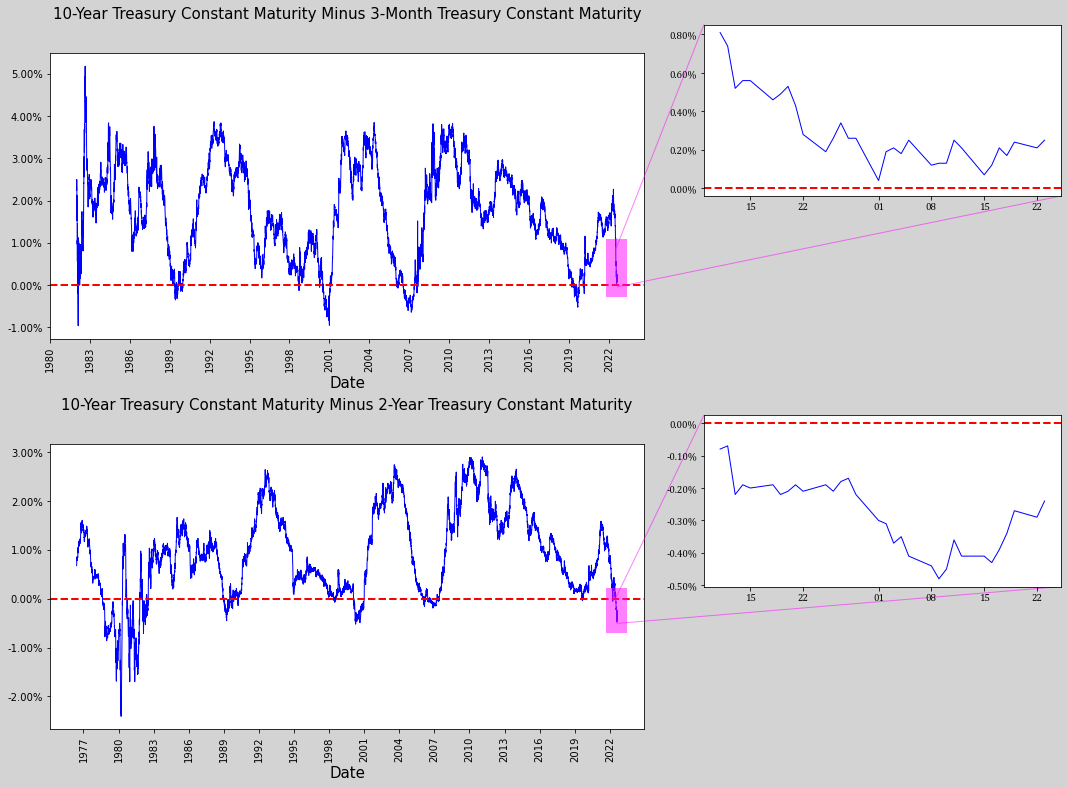

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

from datetime import datetime

unique_variable = list(df["Variable Description"].unique())[0:2]


fig, axs = plt.subplots(nrows= math.ceil(len(unique_variable)/1), ncols=1,figsize = (20,11) ,facecolor= 'lightgray')

plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"


ax = axs.ravel()


for symbol, i in zip(unique_variable, range(0,len(unique_variable))):
    y = df[df["Variable Description"] == symbol]['Value']
    y2 = df[(df["Variable Description"] == symbol) & (df.index >= datetime.now()-pd.to_timedelta("45day"))]['Value']
        
    ax[i].plot(y,color = 'blue' , linewidth = 1)
    ax[i].axhline(y = 0 , color = 'red' , linewidth = 2 , linestyle = '--')
    ax[i].set_title(symbol, fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[i].xaxis.set_major_locator(mdates.YearLocator(3)) 
    ax[i].yaxis.set_major_formatter('{x:1.2f}%')
    ax[i].tick_params(axis='x', rotation=90)
    
    axins = ax[i].inset_axes([1.1,0.5,0.6,0.6])
    axins.plot(y2,color = 'blue' , linewidth = 1)
    axins.axhline(y = 0 , color = 'red' , linewidth = 2 , linestyle = '--')
    axins.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    axins.yaxis.set_major_formatter('{x:1.2f}%')
    
    ax[i].indicate_inset_zoom(axins, edgecolor='magenta',linewidth = 20)
    
fig.tight_layout()

In [13]:
yield_curve_dict = {'DGS1MO':1/12,'DGS3MO':3/12,'DGS6MO':6/12,'DGS1':1,'DGS2':2,'DGS5':5,'DGS7':7,'DGS10':10,'DGS20':20,'DGS30':30}  

df_yield_curve =df.copy()
df_yield_curve['rank'] = df['Variable'].map(yield_curve_dict)


yield_curve_dict.keys()

df_yield_curve = df_yield_curve[(df_yield_curve.index >=datetime(2022,1,1)) & (df_yield_curve['Variable'].isin(yield_curve_dict.keys()))].sort_values(by = ['rank'])

df_yield_curve_pivot = df_yield_curve.pivot(columns = ['rank'],values = 'Value').sort_index(axis='columns', level='rank')
#df_yield_curve_pivot = df_yield_curve.pivot(columns = ['Variable'],values = 'Value').sort_index(axis='columns', level='rank')

df_yield_curve_pivot

rank,0.083333,0.250000,0.500000,1.000000,2.000000,5.000000,7.000000,10.000000,20.000000,30.000000
DATE,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...
2022-08-16,2.26,2.70,3.12,3.26,3.25,2.95,2.90,2.82,3.31,3.11
2022-08-17,2.22,2.68,3.15,3.27,3.28,3.04,2.99,2.89,3.37,3.15
2022-08-18,2.23,2.71,3.12,3.24,3.22,3.02,2.97,2.88,3.35,3.14


In [14]:
df_yield_curve_pivot.rename(columns={ df_yield_curve_pivot.columns[0]: "1M" ,df_yield_curve_pivot.columns[1]: "3M",
                                    df_yield_curve_pivot.columns[2]: "6M",df_yield_curve_pivot.columns[3]: "1Y",
                                    df_yield_curve_pivot.columns[4]: "2Y",df_yield_curve_pivot.columns[5]: "5Y",
                                    df_yield_curve_pivot.columns[6]: "7Y",df_yield_curve_pivot.columns[7]: "10Y",
                                    df_yield_curve_pivot.columns[8]: "20Y",df_yield_curve_pivot.columns[9]: "30Y"}
                            , inplace = True)

df_yield_curve_pivot

rank,1M,3M,6M,1Y,2Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...
2022-08-16,2.26,2.70,3.12,3.26,3.25,2.95,2.90,2.82,3.31,3.11
2022-08-17,2.22,2.68,3.15,3.27,3.28,3.04,2.99,2.89,3.37,3.15
2022-08-18,2.23,2.71,3.12,3.24,3.22,3.02,2.97,2.88,3.35,3.14


<IPython.core.display.Javascript object>


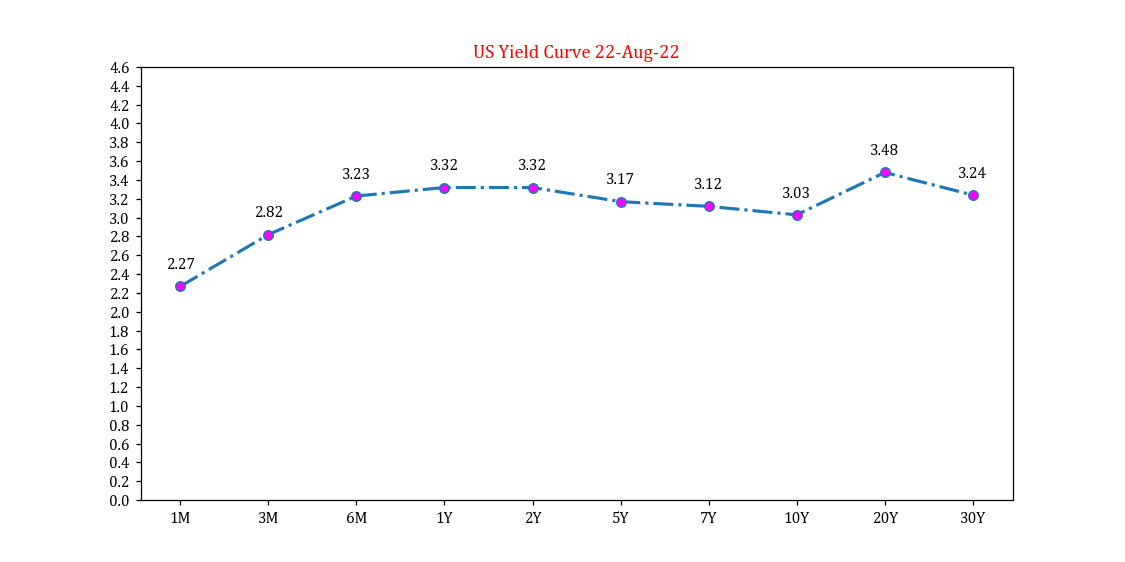

In [15]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation , PillowWriter
import numpy as np
from datetime import datetime
import numpy as np

unique_date = list(df_yield_curve_pivot.index)
    
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(1,1,1)



def animate(i):
    axes.clear()
    idx = pd.IndexSlice
    label  = unique_date[i].strftime("%d-%b-%y")
    x = df_yield_curve_pivot.columns.values
    y = df_yield_curve_pivot.loc[idx[unique_date[i],:]].values
    axes.plot(x,y, linestyle='dashdot' ,linewidth = 2 ,marker='o' ,markerfacecolor='magenta')
    #axes.set_ylim([0,df_yield_curve_pivot.values.max()])
    axes.set_yticks(np.arange(0,df_yield_curve_pivot.values.max() +1,0.2))
    #axe.set_xticklabels(['1M','3M','6M','1Y','2Y','5Y','10Y','20Y','30Y'])s
    #plt.legend([label] , loc = 'lower right',labelcolor='red')
    plt.title('US Yield Curve' + ' ' + label , color = 'red' )
    
    for i,j in zip (x,y):
        marking = "{:.2f}".format(j)
        plt.annotate(marking,(i,j), xytext=(0, 11), textcoords='offset points',ha = 'center')


anim = FuncAnimation(fig,animate,frames=len(unique_date),interval=500 ,repeat = False)
#anim.save(r'C:\Users\DX321VW\OneDrive - EY\Documents\Python Scripts\YieldCurve.mp4',writer="ffmpeg")
 
plt.show()

In [16]:
f = r"animation.gif" 
writergif = PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [17]:
df_correlation_set = df[(df['Variable'] == 'T10Y3M') | (df['Variable'] == 'T10Y2Y')]

In [18]:
df_correlation_set

,Variable,Value,Variable Description
DATE,,,
1982-01-04,T10Y3M,2.32,10-Year Treasury Constant Maturity Minus 3-Mon...
1982-01-05,T10Y3M,2.24,10-Year Treasury Constant Maturity Minus 3-Mon...
1982-01-06,T10Y3M,2.43,10-Year Treasury Constant Maturity Minus 3-Mon...
1982-01-07,T10Y3M,2.46,10-Year Treasury Constant Maturity Minus 3-Mon...
1982-01-08,T10Y3M,2.50,10-Year Treasury Constant Maturity Minus 3-Mon...
...,...,...,...
2022-08-17,T10Y2Y,-0.39,10-Year Treasury Constant Maturity Minus 2-Yea...
2022-08-18,T10Y2Y,-0.34,10-Year Treasury Constant Maturity Minus 2-Yea...
2022-08-19,T10Y2Y,-0.27,10-Year Treasury Constant Maturity Minus 2-Yea...


In [19]:
#df_correlation_set = df_correlation_set[df_correlation_set.index >= '2020-10-01']

In [20]:
df_correlation_set_pivot = df_correlation_set.pivot(columns = 'Variable',values = 'Value')
df_correlation_set_pivot = df_correlation_set_pivot.groupby(by = [df_correlation_set_pivot.index.to_period("M")]).min()
df_correlation_set_pivot 

Variable,T10Y2Y,T10Y3M
DATE,,
1976-06,0.68,NaN
1976-07,0.85,NaN
1976-08,1.08,NaN
1976-09,1.13,NaN
1976-10,1.25,NaN
...,...,...
2022-04,-0.05,1.76
2022-05,0.18,1.66
2022-06,0.03,1.26


In [21]:
dow_jones_price = pd.read_csv('C:/Users/DX321VW/OneDrive - EY/Documents/GitHub/FedRates/Dow Jones Industrial Average Historical Data.csv')
dow_jones_price['Date'] = pd.to_datetime(dow_jones_price['Date'])
dow_jones_price = dow_jones_price.set_index('Date')
dow_jones_price = dow_jones_price.to_period("M")
dow_jones_price['Price'] = dow_jones_price['Price'].str.replace(',', '').astype(float)
dow_jones_price['Price'] = pd.to_numeric(dow_jones_price['Price']) 
dow_jones_price

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-08,34152.04,"32,755.71","34,281.16","32,388.30",NaN,3.97%
2022-07,32846.45,"30,740.97","32,906.21","30,145.31",NaN,6.71%
2022-06,30779.71,"33,156.31","33,270.83","29,654.59",NaN,-6.71%
2022-05,32991.97,"33,045.95","34,113.40","30,635.76",3.01B,0.04%
2022-04,32977.21,"34,740.89","35,492.22","32,913.15",7.22B,-4.91%
...,...,...,...,...,...,...
1970-06,683.53,683.53,683.53,683.53,NaN,-2.41%
1970-05,700.44,700.44,700.44,700.44,NaN,-4.84%
1970-04,736.07,736.07,736.07,736.07,NaN,-6.30%


In [22]:
'''
df_correlation_set_pivot['SP500_ret'] = np.log(df_correlation_set_pivot.SP500) - np.log(df_correlation_set_pivot.SP500.shift(1))
df_correlation_set_pivot['T10Y2Y_ret'] = (df_correlation_set_pivot.T10Y2Y) - (df_correlation_set_pivot.T10Y2Y.shift(1))
df_correlation_set_pivot['T10Y3M_ret'] = (df_correlation_set_pivot.T10Y3M) - (df_correlation_set_pivot.T10Y3M.shift(1))
'''

"\ndf_correlation_set_pivot['SP500_ret'] = np.log(df_correlation_set_pivot.SP500) - np.log(df_correlation_set_pivot.SP500.shift(1))\ndf_correlation_set_pivot['T10Y2Y_ret'] = (df_correlation_set_pivot.T10Y2Y) - (df_correlation_set_pivot.T10Y2Y.shift(1))\ndf_correlation_set_pivot['T10Y3M_ret'] = (df_correlation_set_pivot.T10Y3M) - (df_correlation_set_pivot.T10Y3M.shift(1))\n"

In [23]:
df_correlation_set_pivot = df_correlation_set_pivot.join(dow_jones_price['Price'])
df_correlation_set_pivot 

,T10Y2Y,T10Y3M,Price
1976-06,0.68,NaN,1002.78
1976-07,0.85,NaN,984.64
1976-08,1.08,NaN,973.74
1976-09,1.13,NaN,990.19
1976-10,1.25,NaN,964.93
...,...,...,...
2022-04,-0.05,1.76,32977.21
2022-05,0.18,1.66,32991.97
2022-06,0.03,1.26,30779.71
2022-07,-0.22,0.19,32846.45


In [24]:
conditions = [
    (df_correlation_set_pivot['T10Y2Y'] < 0) & (df_correlation_set_pivot['T10Y3M'].fillna(0) < 0),
    (df_correlation_set_pivot['T10Y2Y'] < 0) & (df_correlation_set_pivot['T10Y3M'].fillna(0) >= 0),
    (df_correlation_set_pivot['T10Y2Y'] >= 0) & (df_correlation_set_pivot['T10Y3M'].fillna(0) < 0),
    (df_correlation_set_pivot['T10Y2Y'] >= 0) & (df_correlation_set_pivot['T10Y3M'].fillna(0) >= 0)
]

In [25]:
letters = ['(-)T10Y2Y & (-)T10Y3M','(-)T10Y2Y & (+)T10Y3M','(+)T10Y2Y & (-)T10Y3M','(+)T10Y2Y & (+)T10Y3M']

In [26]:
df_correlation_set_pivot['Scenario'] = np.select(conditions,letters) 

In [27]:
df_correlation_set_pivot['3M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-3)) - np.log(df_correlation_set_pivot.Price)
df_correlation_set_pivot['6M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-6)) - np.log(df_correlation_set_pivot.Price)
#df_correlation_set_pivot['9M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-9)) - np.log(df_correlation_set_pivot.Price)
df_correlation_set_pivot['12M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-12)) - np.log(df_correlation_set_pivot.Price)
df_correlation_set_pivot['24M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-24)) - np.log(df_correlation_set_pivot.Price)
df_correlation_set_pivot['36M_Forward_Return'] = np.log(df_correlation_set_pivot.Price.shift(-36)) - np.log(df_correlation_set_pivot.Price)



df_correlation_set_pivot




#df_correlation_set_pivot.to_csv('Result1.csv')

,T10Y2Y,T10Y3M,Price,Scenario,3M_Forward_Return,6M_Forward_Return,12M_Forward_Return,24M_Forward_Return,36M_Forward_Return
1976-06,0.68,NaN,1002.78,(+)T10Y2Y & (+)T10Y3M,-0.012635,0.001863,-0.090188,-0.202508,-0.174775
1976-07,0.85,NaN,984.64,(+)T10Y2Y & (+)T10Y3M,-0.020221,-0.031225,-0.100976,-0.132708,-0.151260
1976-08,1.08,NaN,973.74,(+)T10Y2Y & (+)T10Y3M,-0.027613,-0.039080,-0.122481,-0.104843,-0.092589
1976-09,1.13,NaN,990.19,(+)T10Y2Y & (+)T10Y3M,0.014498,-0.074469,-0.156066,-0.134220,-0.119590
1976-10,1.25,NaN,964.93,(+)T10Y2Y & (+)T10Y3M,-0.011004,-0.040210,-0.164765,-0.196926,-0.168009
...,...,...,...,...,...,...,...,...,...
2022-04,-0.05,1.76,32977.21,(-)T10Y2Y & (+)T10Y3M,-0.003973,NaN,NaN,NaN,NaN
2022-05,0.18,1.66,32991.97,(+)T10Y2Y & (+)T10Y3M,0.034558,NaN,NaN,NaN,NaN
2022-06,0.03,1.26,30779.71,(+)T10Y2Y & (+)T10Y3M,NaN,NaN,NaN,NaN,NaN
2022-07,-0.22,0.19,32846.45,(-)T10Y2Y & (+)T10Y3M,NaN,NaN,NaN,NaN,NaN


In [28]:
df_correlation_set_pivot_filtered = df_correlation_set_pivot[(df_correlation_set_pivot['Scenario'] == '(-)T10Y2Y & (-)T10Y3M')|
                                                             (df_correlation_set_pivot['Scenario'] == '(-)T10Y2Y & (+)T10Y3M')]



In [29]:
df_correlation_set_pivot_filtered 

,T10Y2Y,T10Y3M,Price,Scenario,3M_Forward_Return,6M_Forward_Return,12M_Forward_Return,24M_Forward_Return,36M_Forward_Return
1978-08,-0.10,NaN,876.82,(-)T10Y2Y & (+)T10Y3M,-0.092903,-0.080725,0.012253,0.061664,0.005289
1978-09,-0.22,NaN,865.82,(-)T10Y2Y & (+)T10Y3M,-0.072822,-0.004213,0.014630,0.074106,-0.018464
1978-10,-0.53,NaN,792.45,(-)T10Y2Y & (+)T10Y3M,0.057343,0.075855,0.028917,0.154113,0.073102
1978-11,-0.78,NaN,799.03,(-)T10Y2Y & (+)T10Y3M,0.012178,0.028743,0.028768,0.217675,0.106676
1978-12,-0.86,NaN,805.01,(-)T10Y2Y & (+)T10Y3M,0.068609,0.044902,0.041046,0.180226,0.083369
...,...,...,...,...,...,...,...,...,...
2007-06,-0.04,0.12,13408.62,(-)T10Y2Y & (+)T10Y3M,0.035677,-0.010782,-0.166679,-0.462086,-0.316170
2019-08,-0.04,-0.52,26403.28,(-)T10Y2Y & (-)T10Y3M,0.060551,-0.038371,0.073958,0.292114,0.257334
2022-04,-0.05,1.76,32977.21,(-)T10Y2Y & (+)T10Y3M,-0.003973,NaN,NaN,NaN,NaN
2022-07,-0.22,0.19,32846.45,(-)T10Y2Y & (+)T10Y3M,NaN,NaN,NaN,NaN,NaN


In [30]:
summary_table = pd.pivot_table(df_correlation_set_pivot_filtered,
                values = ['3M_Forward_Return','6M_Forward_Return','12M_Forward_Return','24M_Forward_Return','36M_Forward_Return'],
                index = ['Scenario',df_correlation_set_pivot_filtered.index.year],
                aggfunc = np.mean)

summary_table

12M_Forward_Return  24M_Forward_Return  \
Scenario                                                             
(-)T10Y2Y & (+)T10Y3M 1978            0.025123            0.137557   
                      1979            0.058009            0.099368   
                      1980            0.046265            0.016975   
                      1981           -0.049160            0.250890   
                      1982            0.346817            0.326681   
                      1988            0.216521            0.283962   
                      1989            0.104778            0.111426   
                      1990           -0.027544            0.108268   
                      1998            0.109375            0.221650   
                      2000           -0.010792           -0.083988   
                      2005            0.150898            0.213237   
                      2006            0.184439            0.017759   
                      2007           -0.166679           -0.462086   
                      2022                 NaN                 NaN   
(-)T10Y2Y & (-)T10Y3M 1982            0.299829            0.336892   
                      1989            0.078124            0.067330   
                      2000           -0.030026           -0.099770   
                      2006            0.128994           -0.068517   
                      2007           -0.020178           -0.491184   
                      2019            0.073958            0.292114   

                            36M_Forward_Return  3M_Forward_Return  \
Scenario                                                            
(-)T10Y2Y & (+)T10Y3M 1978            0.049995          -0.005519   
                      1979            0.050208           0.001241   
                      1980            0.294539           0.035739   
                      1981            0.232380          -0.037511   
                      1982            0.441488           0.051722   
                      1988            0.284479           0.040584   
                      1989            0.215153           0.031462   
                      1990            0.215760           0.060711   
                      1998            0.198029          -0.154109   
                      2000           -0.175207           0.022907   
                      2005           -0.199813           0.035906   
                      2006           -0.277648           0.046339   
                      2007           -0.316170           0.035677   
                      2022                 NaN          -0.003973   
(-)T10Y2Y & (-)T10Y3M 1982            0.445247          -0.005901   
                      1989            0.180423           0.029235   
                      2000           -0.253619          -0.004501   
                      2006           -0.250452           0.035192   
                      2007           -0.205938           0.050325   
                      2019            0.257334           0.060551   

                            6M_Forward_Return  
Scenario                                       
(-)T10Y2Y & (+)T10Y3M 1978           0.012912  
                      1979           0.002839  
                      1980           0.083819  
                      1981          -0.082334  
                      1982           0.157337  
                      1988           0.109204  
                      1989           0.075711  
                      1990           0.070584  
                      1998           0.002977  
                      2000           0.022865  
                      2005           0.039581  
                      2006           0.111317  
                      2007          -0.010782  
                      2022                NaN  
(-)T10Y2Y & (-)T10Y3M 1982           0.089206  
                      1989           0.033771  
                      2000          -0.008075  
                      2006           0.069557  
        

In [31]:
summary_table = summary_table[['3M_Forward_Return','6M_Forward_Return','12M_Forward_Return','24M_Forward_Return','36M_Forward_Return']]
summary_table

3M_Forward_Return  6M_Forward_Return  \
Scenario                                                           
(-)T10Y2Y & (+)T10Y3M 1978          -0.005519           0.012912   
                      1979           0.001241           0.002839   
                      1980           0.035739           0.083819   
                      1981          -0.037511          -0.082334   
                      1982           0.051722           0.157337   
                      1988           0.040584           0.109204   
                      1989           0.031462           0.075711   
                      1990           0.060711           0.070584   
                      1998          -0.154109           0.002977   
                      2000           0.022907           0.022865   
                      2005           0.035906           0.039581   
                      2006           0.046339           0.111317   
                      2007           0.035677          -0.010782   
                      2022          -0.003973                NaN   
(-)T10Y2Y & (-)T10Y3M 1982          -0.005901           0.089206   
                      1989           0.029235           0.033771   
                      2000          -0.004501          -0.008075   
                      2006           0.035192           0.069557   
                      2007           0.050325           0.057342   
                      2019           0.060551          -0.038371   

                            12M_Forward_Return  24M_Forward_Return  \
Scenario                                                             
(-)T10Y2Y & (+)T10Y3M 1978            0.025123            0.137557   
                      1979            0.058009            0.099368   
                      1980            0.046265            0.016975   
                      1981           -0.049160            0.250890   
                      1982            0.346817            0.326681   
                      1988            0.216521            0.283962   
                      1989            0.104778            0.111426   
                      1990           -0.027544            0.108268   
                      1998            0.109375            0.221650   
                      2000           -0.010792           -0.083988   
                      2005            0.150898            0.213237   
                      2006            0.184439            0.017759   
                      2007           -0.166679           -0.462086   
                      2022                 NaN                 NaN   
(-)T10Y2Y & (-)T10Y3M 1982            0.299829            0.336892   
                      1989            0.078124            0.067330   
                      2000           -0.030026           -0.099770   
                      2006            0.128994           -0.068517   
                      2007           -0.020178           -0.491184   
                      2019            0.073958            0.292114   

                            36M_Forward_Return  
Scenario                                        
(-)T10Y2Y & (+)T10Y3M 1978            0.049995  
                      1979            0.050208  
                      1980            0.294539  
                      1981            0.232380  
                      1982            0.441488  
                      1988            0.284479  
                      1989            0.215153  
                      1990            0.215760  
                      1998            0.198029  
                      2000           -0.175207  
                      2005           -0.199813  
                      2006           -0.277648  
                      2007           -0.316170  
                      2022                 NaN  
(-)T10Y2Y & (-)T10Y3M 1982            0.445247  
                      1989            0.180423  
                      2000           -0.253619  
                      2006           -0.250452  
          

In [32]:
#summary_table.style.format("{:.2%}")
#pd.options.display.float_format = '{:.2f}%'
summary_table_format = summary_table.style.format({"3M_Forward_Return": "{:.2%}", 
                          "6M_Forward_Return": "{:.2%}", 
                          "12M_Forward_Return": "{:.2%}",
                          "24M_Forward_Return": "{:.2%}",
                          "36M_Forward_Return": "{:.2%}"},na_rep="-")



In [33]:
summary_table_format

In [34]:
s=summary_table_format.set_table_styles([
    {'selector': 'th',
    'props': [
        ('border-color', 'grey'),
        ('vertical-align','top')
    ]
    },
{'selector': 'td.data',
    'props': [
        ('border', '1px solid darkblue'),
    ]
    }]
)

s

In [35]:
'''
#lag = 10
y = df_correlation_set_pivot_dropna['SP500_ret'].values
x = df_correlation_set_pivot_dropna['T10Y2Y_ret'].values
#x_lag = x[:-lag]
#y_lag = y[lag:]

output = pd.DataFrame()

for i in range(1,200):
    lag = i
    x_lag = x[:-lag]
    y_lag = y[lag:]
    corr_coef = np.corrcoef(x_lag,y_lag)[0][1]
    result = pd.DataFrame({'Correlation': corr_coef}, index =  [lag])
    output = output.append(result)
'''
    

"\n#lag = 10\ny = df_correlation_set_pivot_dropna['SP500_ret'].values\nx = df_correlation_set_pivot_dropna['T10Y2Y_ret'].values\n#x_lag = x[:-lag]\n#y_lag = y[lag:]\n\noutput = pd.DataFrame()\n\nfor i in range(1,200):\n    lag = i\n    x_lag = x[:-lag]\n    y_lag = y[lag:]\n    corr_coef = np.corrcoef(x_lag,y_lag)[0][1]\n    result = pd.DataFrame({'Correlation': corr_coef}, index =  [lag])\n    output = output.append(result)\n"

In [36]:
'''min(output['Correlation'])'''

"min(output['Correlation'])"

In [37]:
'''
SP500_10Y2Y = df_correlation_set_pivot['SP500_ret'].rolling(60).corr(df_correlation_set_pivot['T10Y2Y_ret'])
SP500_10Y3M = df_correlation_set_pivot['SP500_ret'].rolling(60).corr(df_correlation_set_pivot['T10Y3M_ret'])
'''

"\nSP500_10Y2Y = df_correlation_set_pivot['SP500_ret'].rolling(60).corr(df_correlation_set_pivot['T10Y2Y_ret'])\nSP500_10Y3M = df_correlation_set_pivot['SP500_ret'].rolling(60).corr(df_correlation_set_pivot['T10Y3M_ret'])\n"

In [38]:
'''
SP500_10Y2Y = SP500_10Y2Y.dropna()
SP500_10Y3M = SP500_10Y3M.dropna()
'''

'\nSP500_10Y2Y = SP500_10Y2Y.dropna()\nSP500_10Y3M = SP500_10Y3M.dropna()\n'

In [39]:
'''
plt.figure(figsize = (10,5))
plt.plot(SP500_10Y2Y,linewidth = 2 , linestyle = '--' , color = 'blue')
plt.plot(SP500_10Y3M,linewidth = 2 , linestyle = '--' , color = 'red')
plt.tick_params(axis='x', rotation=90)
plt.legend(['SP500_10Y2Y','SP500_10Y3M'])
plt.title('40d Rolling Correlation')
'''

"\nplt.figure(figsize = (10,5))\nplt.plot(SP500_10Y2Y,linewidth = 2 , linestyle = '--' , color = 'blue')\nplt.plot(SP500_10Y3M,linewidth = 2 , linestyle = '--' , color = 'red')\nplt.tick_params(axis='x', rotation=90)\nplt.legend(['SP500_10Y2Y','SP500_10Y3M'])\nplt.title('40d Rolling Correlation')\n"

In [40]:
'''
df_correlation_set_pivot_dropna = df_correlation_set_pivot.dropna()
df_correlation_set_pivot_dropna
'''

'\ndf_correlation_set_pivot_dropna = df_correlation_set_pivot.dropna()\ndf_correlation_set_pivot_dropna\n'

In [41]:
'''
corr = (len(df_correlation_set_pivot_dropna['SP500_ret']) - len(df_correlation_set_pivot_dropna['T10Y2Y_ret']) + 1) * [0]

#np.correlate(a=df_correlation_set_pivot_dropna['SP500_ret'],v=df_correlation_set_pivot_dropna['T10Y2Y_ret'])

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_39360/889723574.py, line 4)

In [ ]:
'''from scipy import signal'''

In [ ]:
'''
for first in range (0,len(x)):
    for second in range(first + 1, len(y)):
        corr = np.correlate(x[first], y[second], mode='full')
        #max_corr[first, second] = numpy.max(corr)
'''

In [ ]:
'''
from numpy.random import default_rng
rng = default_rng()
x = rng.standard_normal(2)
y = rng.standard_normal(1)
np.concatenate([y,x])
'''